### Epic walkthrough of the System

At first, there is nothing, this piece of code gets run first to establish a MySQL connection to the database. 
(if you're testing out the script on your system, best to adjust the username and password for your MySQL account)

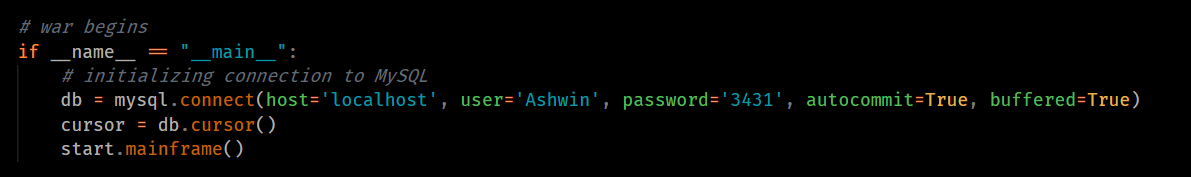

#### This function is run at first: 

It basically starts off the script to where it can check if you have the prerequisite tables that are needed (which will be explained later) and from there one, to the login pages for either teachers, students or admins.

#### This is the function that the above statement runs 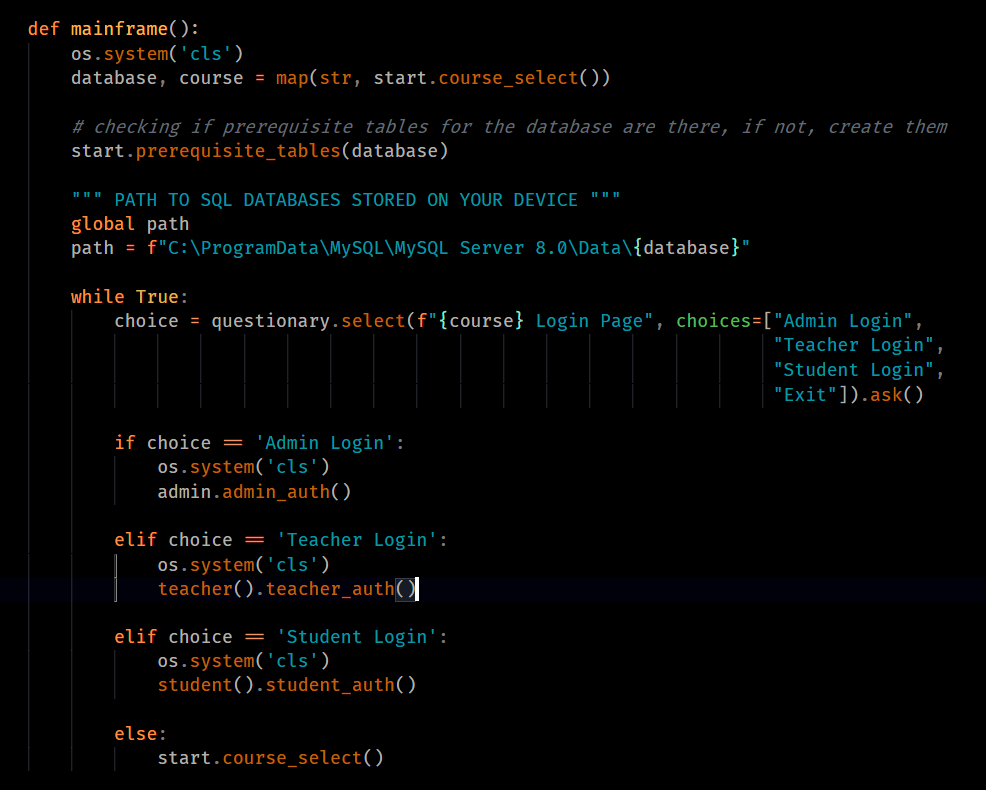

The function is under the class **start** which stores the **mainframe** function which starts off the login process, the **prerequisite_tables** function: 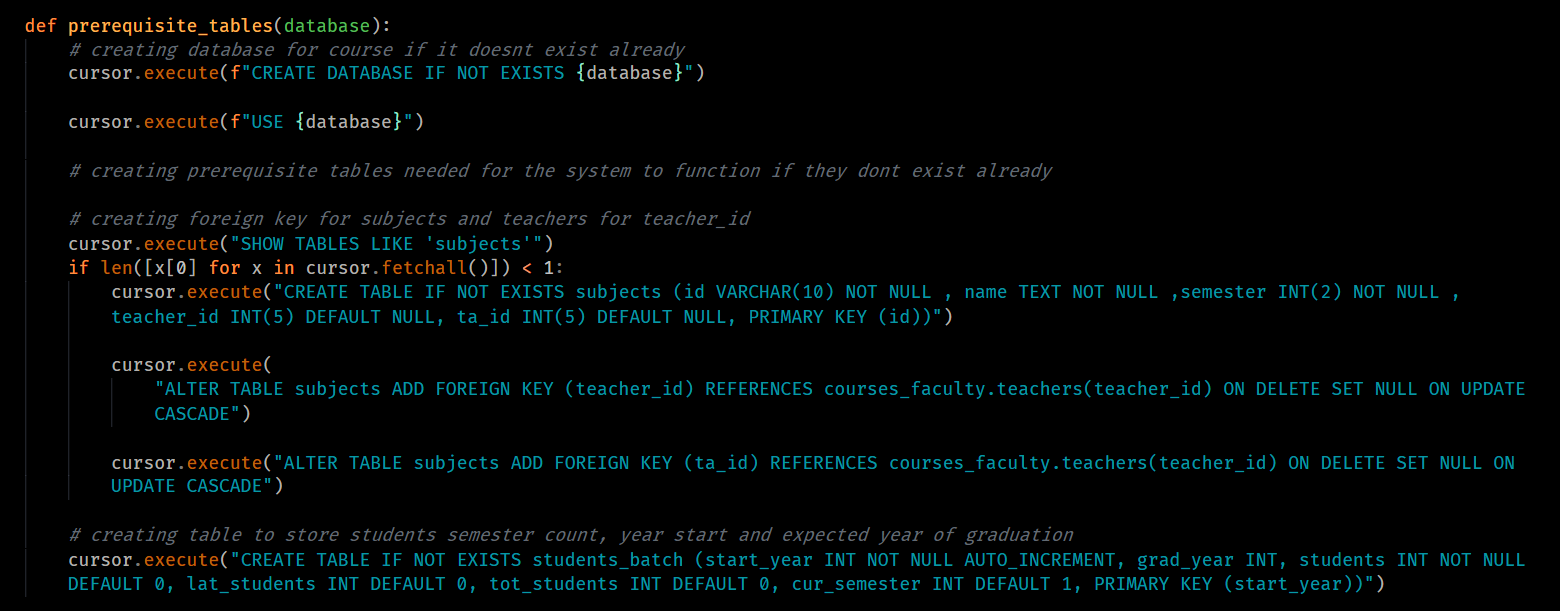 It creates the **subjects** and the **students_batch** tables which are necessary for each course (etc: B Tech CSE, Chemical Engineering ...) since each course has it's own database. The above **prerequisite_tables** function is run in the **mainframe** function after the **course_select** function is run first:

This function initially checks if there exists a database called **'courses_faculty'** in the system, if not it creates it. It creates a table called **'admins'** which will store the details of all the admins that can access the system, along with a table called **'teachers'** which stores the details of teachers that would be apppointed to courses and subjects within those courses. It asks to create an admin account that can be used to access the admin menu of the system. It also creates a **'courses'** table which will store the details of the courses that are being offered by the university

##### IMPORTANT NOTE, THE DATABASES THAT ARE GOING TO BE CREATED FOR EACH COURSE (TO STORE GRADES AND STUDENT RECORDS IN EACH COURSE) ARE GOING TO BE CREATED DEPENDING ON THE ID OF THAT COURSE WHICH IS STORED IN THE courses TABLE WITHIN THE MAIN courses_faculty DATABASE
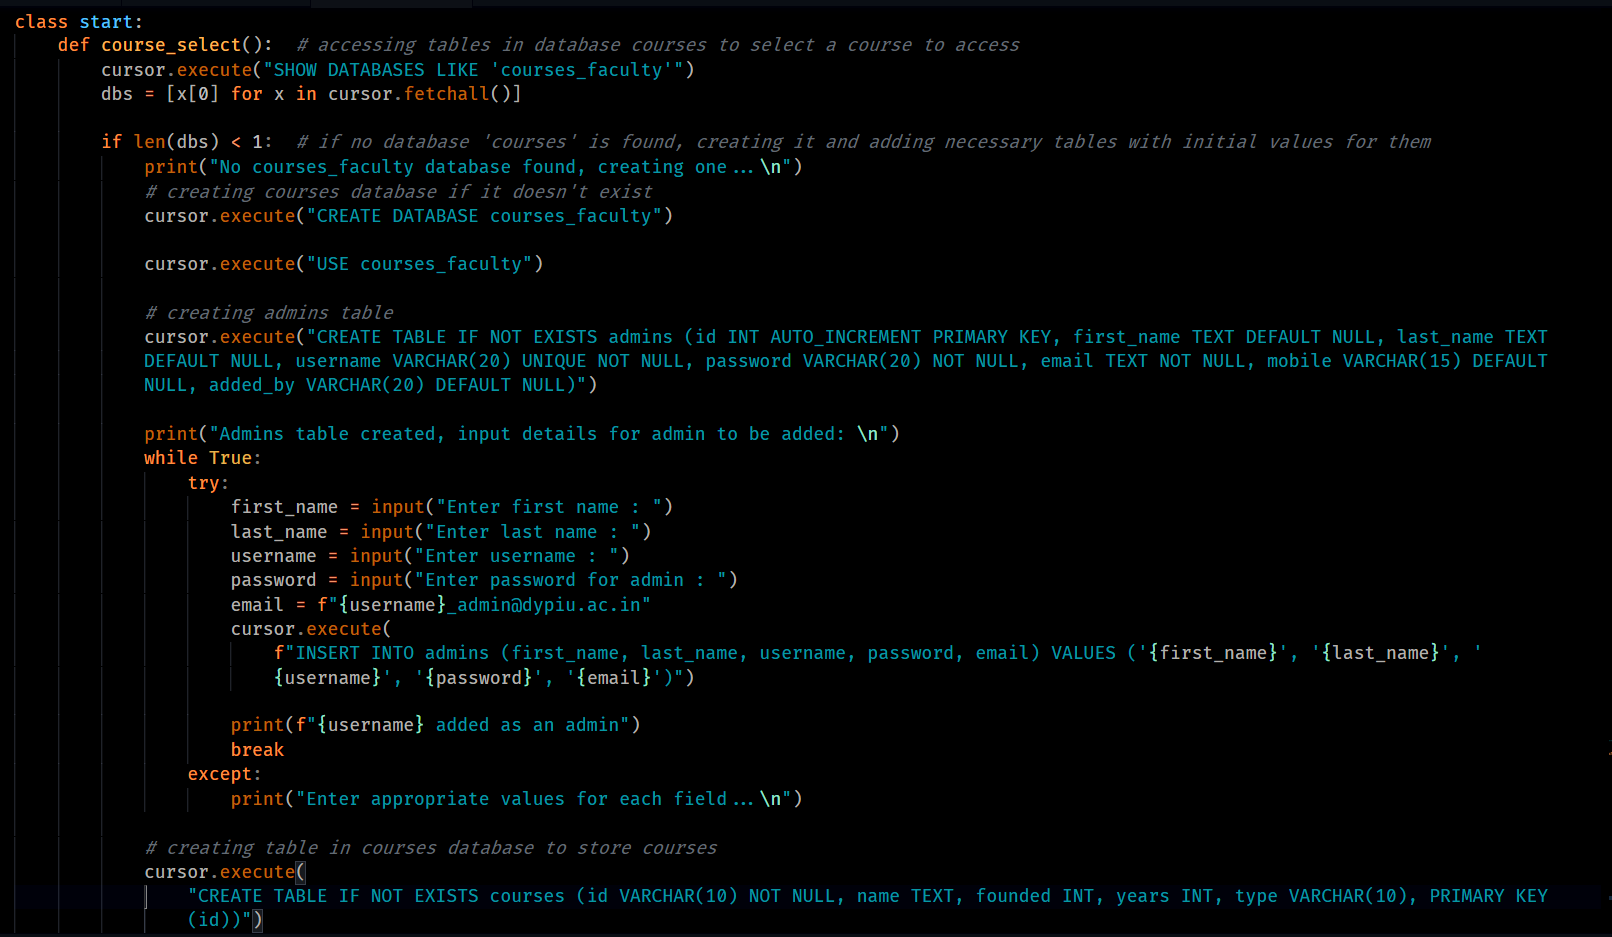 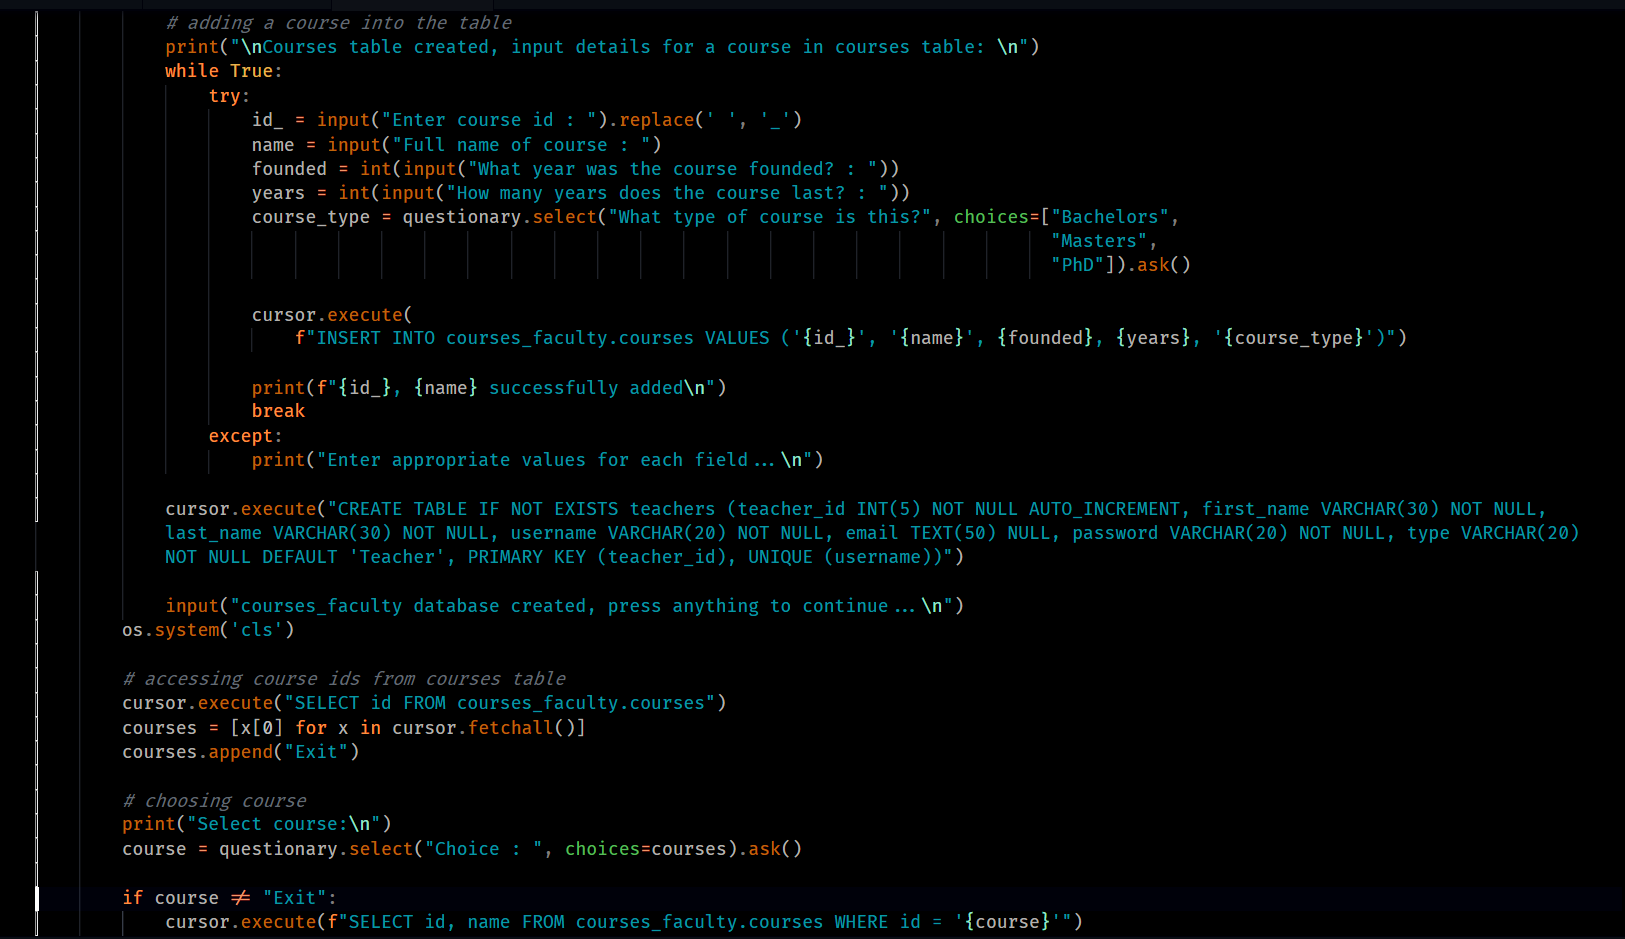 
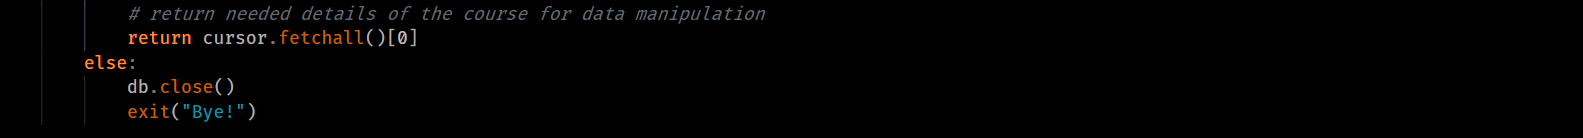 **ALL THE 3 FUNCTIONS MENTIONED ABOVE ARE PART OF THE 'START' CLASS**

The function's main purpose is to be used as a way to create prerequisite tables for systems that are launching the system for the first system and creating the **courses_faculty** database, create an admin account to access the admin menu of the system and to create a course as to get the system going. 

The function is also used as a start part when the system is initialized by asking the user which course they would like to access.

Running the script for the first time, entering details for the first admin and for the first course: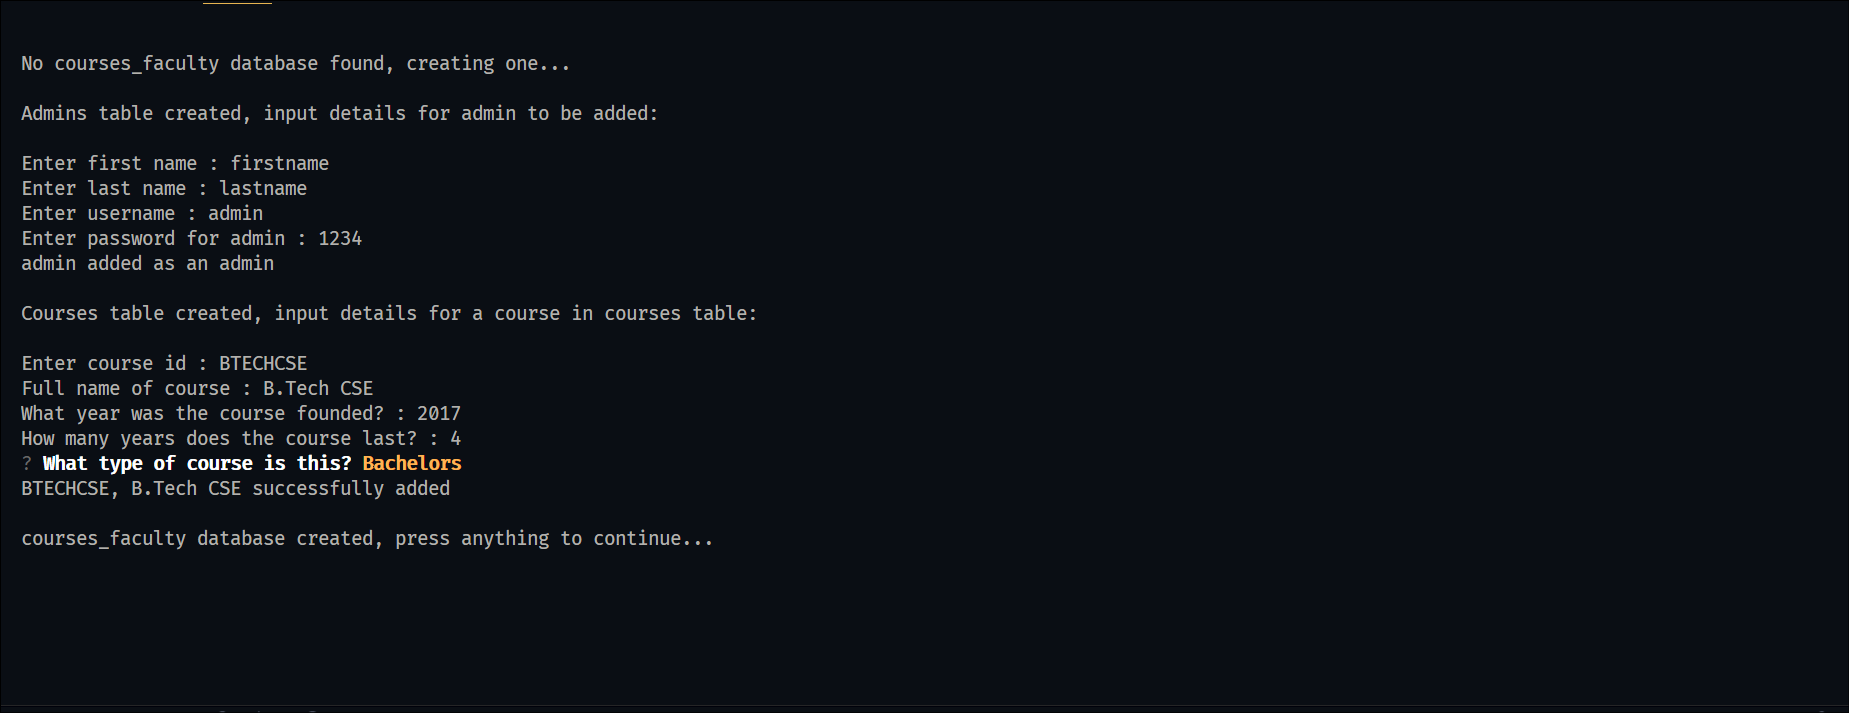

As we would be able to see on phpmyadmin, the courses_faculty database is created: 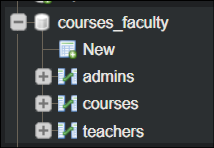

#### Details about tables in main courses_faculty database

##### admins
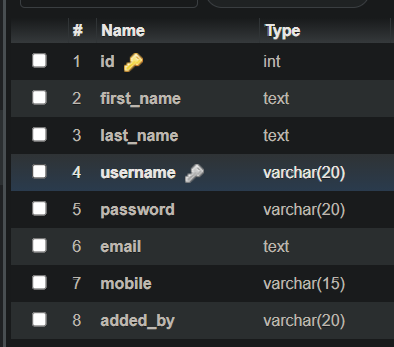
* id - auto incrementing value assigned to each admin (primary key)
* first_name = first name of admin
* last_name = last name of admin
* username = username of admin account, unique value, used to log in
* password = password of admin account
* email = email account for admin: created internally: 
* mobile = store mobile number of admin
* added_by = store the username of admin account that created the account (initially it is blank for the first admin created by the system)

After creating the table and entering details for first admin, the table looks like this: 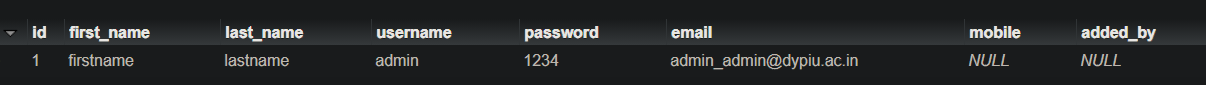

##### courses
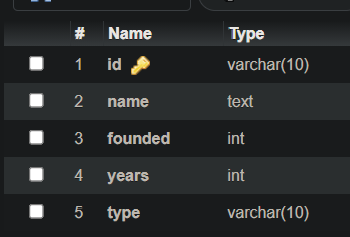
* id = stores the course id (**IMPORTANT: THE NAMES OF DATABASES THAT STORE THE MARKSHEETS AND STUDENT RECORDS FOR EACH            COURSE IS NAMED AFTER THE ID OF THE COURSE STORED IN THIS TABLE**)
* name = stores the full form name of the course
* founded = stores the year the course was founded
* years = length of the course in years (used to create events to auto increment semester count for students in course)
* type = Bachelor, Masters or PhD course

After creating the table and entering details for first course, the table looks like this: 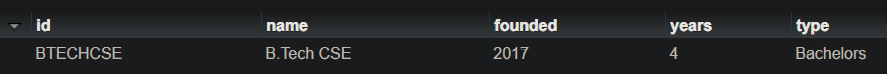

##### teachers
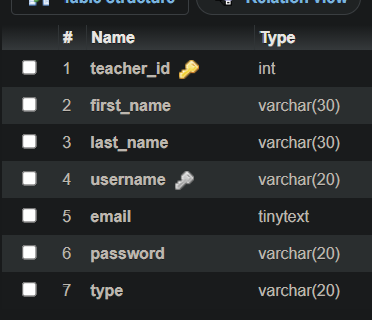
* teacher_id = stores auto incrementing  value as id for teacher (primary key)
* first_name = first name of teacher
* last_name = last name of teacher
* username = username of teacher account, unique value, used to log in
* email = email account for teacher: created internally same as for admins
* password = password of teacher account
* type = whether it is a teacher or TA

There are no teachers entered in the table initially, that can be done by the admin after logging into the system

#### Running system after adding prerequisite tables for courses_faculty database

The **prerequisite_tables** function under the **start** class is then run to create the database (if it doesnt exist) depending on the course id stored in the **courses** table: 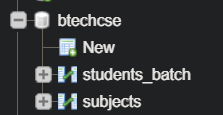

##### students_batch
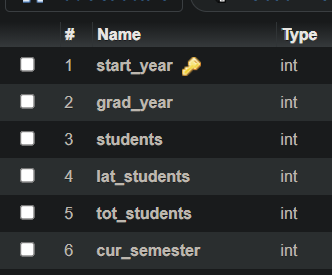
This table stores the details of each student batch, for each new entry, another table (which is described below) is created to store the details of the students in that particular batch.
* start_year = stores the year the batch started their academic year (primary key)
* grad_year = year the students in this batch are expected to graduate
* students = stores the count of non-lateral entry students
* lat_students = stores the count of lateral entry students (automatically deemed as lateral if entry semester is not 1)
* tot_students = total count of students (lateral students count + non lateral students count)
* cur_semester = stores what semester this batch is currently in


##### subjects
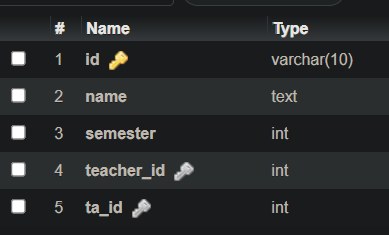
This table stores the details of subjects in this course, for each new entry, another table if created (which is described below) that stores the specific details about the subject structure as they are different for each subject.
* id = stores the id (abbreviation form) of the subject
* name = stores the full name of the subject
* semester = which semester is this subject in
* teacher_id = stores the id of teacher (whose type in the teachers table in courses_faculty table is 'Teacher')
* ta_id = stores the id of teacher (whose type in the teachers table in courses_faculty table is 'TA')

After a subject is entered into this table (via the option that exists for the admin), using functions within the script, fake data is generated depending on the subject structure, models are trained ands stored to be used for predictions. The subjects table looks like this after an entry is added: 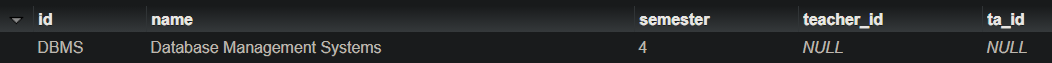 (obviously no teacher or TA is assigned to the subject yet so no teacher can access the subject yet and give marks, there are also no student batches declared so there is no student that is taking this subject yet). 

However, a new table (whose naming scheme is "{subject_id}_details"), is then created: 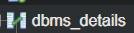 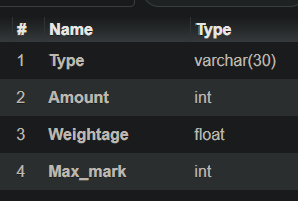 This table will **ONLY** be used to store the details for that particular subject. Each subject gets its own "{subject_id}_details" table. In this case the table looks like this after storing the details of the subject structure: 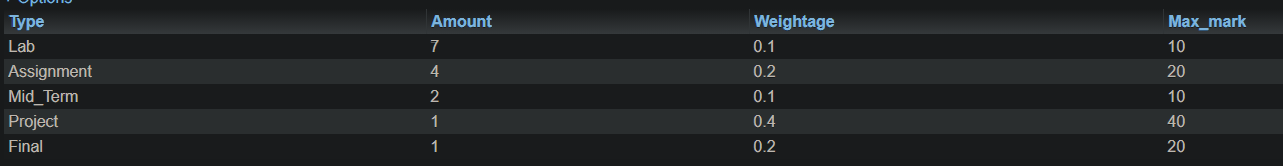 All of which are important to calculate and predict grades.

Let's add an entry to the students_batch table to declare a new batch for this course, the **students_batch** table now looks like this: 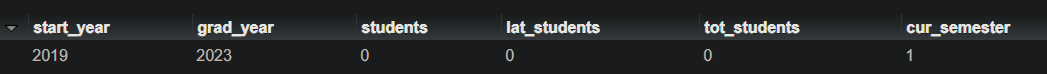 

A new table with the naming scheme "students_{start_year}" is created to store the records of all students in that batch: the table when described looks like: 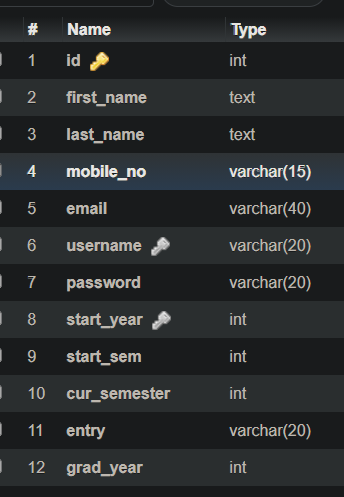
* id = stores the auto incrementing id number of that student in that batch (primary key)
* first_name = first name of student
* last_name = last name of student
* mobile_no = stores the mobile number of student
* email = stores the email of student
* username = stores the username of that student (unique)
* password = password of student
* start_year = stores the year the academic year start for this batch (foreign key that references start_year in **students_batch** table
* start_sem = stores the semester this student joined the batch
* cur_semester = current semester count for student
* entry = Normal or lateral entry
* grad_year = stores expected year of graduation

When adding 2 students to the table, it looks like this: 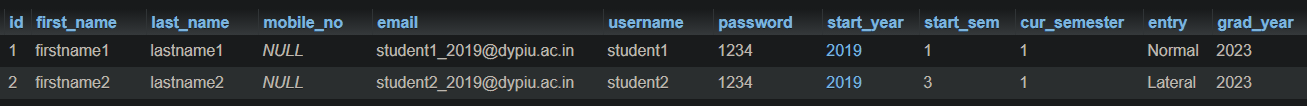

**WHENEVER A NEW STUDENT BATCH OR NEW SUBJECT IS ADDED, A NEW TABLE (NAMING SCHEME = "students_{start_year}_{subject_id}") IS CREATED TO STORE THE MARKS OF THE STUDENTS IN THAT BATCH FOR A PARTICULAR SUBJECT**

For example: 
Since so far we have 1 student batch (2019 batch with 2 students added for demonstration and one subject so far, in this case DBMS). The table looks like this: 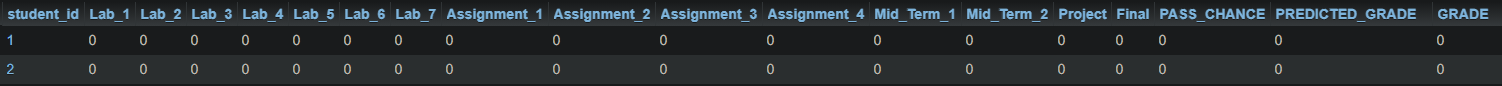

The last 4 columns are added for showcasing the actual grade and predicted grades while the rest are generated based on the structure of the subject. From here on teachers and students can observe the grades for that particular subject. If you are curious this is how the describing of the table looks like: 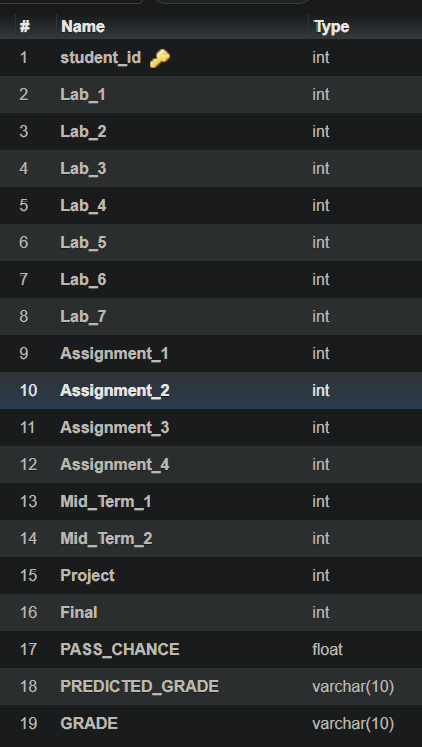

### Let's add more subjects and student batches 

Let's add a 2020 student batch to the BTECHCSE database, this is the new view of the **students_batch** table after declaring a new batch: 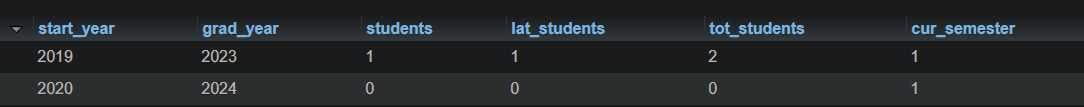

Subsequently, a **students_2020** table then gets craeted to store the details of students in the 2020 batch, and a **students_2020_dbms** table gets created to store the marks for students in the 2020 batch (if there were other subjects that were declared in the **subjects** table, more tables for each batch would be created, as well as **"{subject_id}_details"** table being created to store the subject structure along with models to perform predictions for that subject): 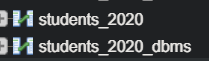

Suppose we add another subject, CHEMENG. The **subjects** table now looks like: 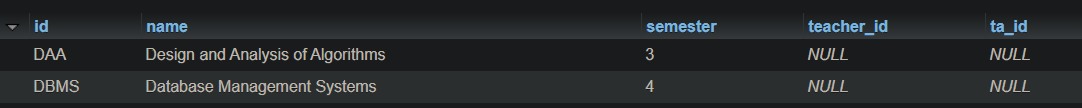
A table gets created, based on the subject_id to store the details of that particular subject: 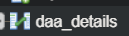

Along with 2 more tables to store the marksheets for that subject for the 2 batches that we have registed so far, to make the BTECHCSE database look like this so far: 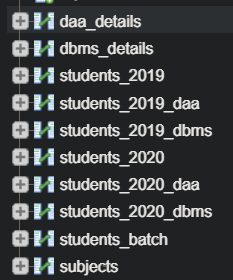

### ANY OPERATIONS THAT AN ADMIN, TEACHER OR STUDENT CAN PERFORM IS EXPLICITLY STATED IN THE NEW SCRIPT SO THE CODE FOR EACH OPERATION CAN BE SEEN 